### Description of data

1. BOROUGH (Borough) = The borough in which the tax lot is located.
2. TAX LOT (Lot) = The number of the tax lot.
3. ZIP CODE (ZipCode) = A ZIP code that is valid for one of the addresses assigned to the tax lot.
4. ADDRESS (Address) = An address for the tax lot.
5. LOT AREA (LotArea) = Total area of the tax lot, expressed in square feet rounded to the nearest integer.
6. TOTAL BUILDING FLOOR AREA (BldgArea) = The total gross area in square feet, except for condominium measurements
7. COMMERCIAL FLOOR AREA (ComArea) = An estimate of the exterior dimensions of the portion of the structure(s) allocated for commercial use.
8. RESIDENTIAL FLOOR AREA (ResArea) = An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use.
9. OFFICE FLOOR AREA (OfficeArea) = An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use.
10. RETAIL FLOOR AREA (RetailArea) = An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use.
11. NUMBER OF BUILDINGS (NumBldgs) = The number of buildings on the tax lot.
12. NUMBER OF FLOORS (NumFloors) = The number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.
13. LOT DEPTH (LotDepth) = The tax lot's depth measured in feet.
14. BUILDING DEPTH (BldgDepth) = The building’s depth, which is the effective perpendicular distance, measured in feet.
15. YEAR BUILT (YearBuilt) = The year construction of the building was completed.
16. YEAR ALTERED 1 (YearAlter1) = If a building has only been altered once, YEAR ALTERED 1 is the date that alteration began.
17. BUILT FLOOR AREA RATIO (BuiltFAR) = The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.
18. MAXIMUM ALLOWABLE RESIDENTIAL FAR (ResidFAR) = The maximum allowable residential floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area
19. MAXIMUM ALLOWABLE COMMERCIAL FAR (CommFAR) = The maximum allowable commercial floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area
20. MAXIMUM ALLOWABLE COMMUNITY FACILITY FAR (FacilFAR) = The maximum allowable community facility floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area
21. LATITUDE (Latitude) = The WGS 84 latitude of the latitude/longitude coordinate pair for the approximate location of the tax lot.
22. LONGITUDE (Longitude) = The WGS 84 longitude of the latitude/longitude coordinate pair for the approximate location of the tax lot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.25)

pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

### Examine the Bronx dataset

In [2]:
df = pd.read_csv("bronx.csv")

In [3]:
df.head()

,borough,lot,zipcode,address,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,latitude,longitude
0,BX,47,10469.0,3310 BRONXWOOD AVENUE,2500.0,2288.0,0.0,2288.0,0.0,0.0,1.0,2.0,100.00,52.0,1960.0,0.0,0.92,1.25,0.0,2.0,40.873572,-73.860952
1,BX,72,10466.0,4031 ELY AVENUE,1629.0,1584.0,0.0,1152.0,0.0,0.0,1.0,2.0,90.50,32.0,1950.0,0.0,0.97,0.75,0.0,2.0,40.890608,-73.845925
2,BX,183,10466.0,964 EAST 229 STREET,1970.0,1485.0,0.0,1080.0,0.0,0.0,1.0,2.0,109.42,32.0,1955.0,0.0,0.75,0.75,0.0,2.0,40.887873,-73.851034
3,BX,33,10469.0,1006 EAST GUN HILL ROAD,2500.0,3933.0,1337.0,2596.0,0.0,1337.0,1.0,3.0,100.00,60.0,1938.0,0.0,1.57,3.00,0.0,3.0,40.874358,-73.857873
4,BX,14,10466.0,3879 AMUNDSON AVENUE,1800.0,1701.0,0.0,1188.0,0.0,0.0,1.0,2.0,100.00,33.0,1957.0,0.0,0.95,0.75,0.0,2.0,40.888725,-73.835676


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86157 entries, 0 to 86156
Data columns (total 22 columns):
borough       86157 non-null object
lot           86157 non-null int64
zipcode       85881 non-null float64
address       86112 non-null object
lotarea       86097 non-null float64
bldgarea      86109 non-null float64
comarea       79299 non-null float64
resarea       79299 non-null float64
officearea    79299 non-null float64
retailarea    79299 non-null float64
numbldgs      86097 non-null float64
numfloors     86097 non-null float64
lotdepth      86097 non-null float64
bldgdepth     86097 non-null float64
yearbuilt     86112 non-null float64
yearalter1    86112 non-null float64
builtfar      86061 non-null float64
residfar      86112 non-null float64
commfar       86112 non-null float64
facilfar      86112 non-null float64
latitude      86034 non-null float64
longitude     86034 non-null float64
dtypes: float64(19), int64(1), object(2)
memory usage: 14.5+ MB


In [5]:
df.describe(include='all')

,borough,lot,zipcode,address,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,latitude,longitude
count,86157,86157.000000,85881.000000,86112,8.609700e+04,8.610900e+04,7.929900e+04,7.929900e+04,7.929900e+04,79299.000000,86097.000000,86097.000000,86097.000000,86097.000000,86112.000000,86112.000000,86061.000000,86112.000000,86112.000000,86112.000000,86034.000000,86034.000000
unique,1,NaN,NaN,83504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BX,NaN,NaN,WHITE PLAINS ROAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,86157,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,111.709681,10464.267300,NaN,1.070776e+04,8.212329e+03,2.365772e+03,6.259273e+03,5.332947e+02,370.805168,1.187660,2.293247,105.848129,48.490977,1808.936455,189.154915,1.111315,1.621161,0.124770,2.856940,40.852750,-73.864674
std,NaN,464.859186,6.666287,NaN,3.128538e+05,6.547880e+04,3.045994e+04,5.958354e+04,1.166006e+04,4584.968117,1.824769,1.522192,68.138374,31.580613,495.109125,585.366130,1.081624,1.344561,0.556574,1.603245,0.026935,0.031337
min,NaN,1.000000,10451.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.791125,-73.933200
25%,NaN,20.000000,10460.000000,NaN,2.200000e+03,1.600000e+03,0.000000e+00,1.280000e+03,0.000000e+00,0.000000,1.000000,2.000000,95.000000,35.000000,1920.000000,0.000000,0.560000,0.750000,0.000000,2.000000,40.830594,-73.891697
50%,NaN,41.000000,10465.000000,NaN,2.518000e+03,2.242000e+03,0.000000e+00,1.900000e+03,0.000000e+00,0.000000,1.000000,2.000000,100.000000,45.000000,1931.000000,0.000000,0.860000,1.100000,0.000000,2.000000,40.848875,-73.858765
75%,NaN,73.000000,10469.000000,NaN,4.304000e+03,3.300000e+03,0.000000e+00,2.720000e+03,0.000000e+00,0.000000,1.000000,3.000000,102.580000,56.000000,1960.000000,0.000000,1.260000,2.430000,0.000000,4.800000,40.875026,-73.844736


In [6]:
df['lot'].value_counts()

1       2381
20      1158
15      1133
5       1123
25      1119
        ... 
3045       1
1124       1
1188       1
1444       1
2049       1
Name: lot, Length: 1912, dtype: int64

In [7]:
df['zipcode'].value_counts()

10469.0    10857
10466.0     8843
10465.0     7842
10461.0     7228
10473.0     4661
10467.0     4486
10462.0     4460
10472.0     4145
10457.0     2926
10460.0     2801
10456.0     2780
10458.0     2654
10459.0     2494
10470.0     2259
10471.0     2254
10463.0     2141
10453.0     2037
10455.0     1708
10454.0     1658
10468.0     1565
10452.0     1493
10464.0     1437
10474.0     1187
10451.0     1169
10475.0      795
11370.0        1
Name: zipcode, dtype: int64

In [8]:
df_num = df.drop(columns=['borough','lot','zipcode','address','yearbuilt','yearalter1','latitude','longitude'],axis=1)

In [9]:
df_num.head()

,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar
0,2500.0,2288.0,0.0,2288.0,0.0,0.0,1.0,2.0,100.00,52.0,0.92,1.25,0.0,2.0
1,1629.0,1584.0,0.0,1152.0,0.0,0.0,1.0,2.0,90.50,32.0,0.97,0.75,0.0,2.0
2,1970.0,1485.0,0.0,1080.0,0.0,0.0,1.0,2.0,109.42,32.0,0.75,0.75,0.0,2.0
3,2500.0,3933.0,1337.0,2596.0,0.0,1337.0,1.0,3.0,100.00,60.0,1.57,3.00,0.0,3.0
4,1800.0,1701.0,0.0,1188.0,0.0,0.0,1.0,2.0,100.00,33.0,0.95,0.75,0.0,2.0


In [10]:
df_num.dropna(inplace=True)

In [11]:
df_num.isnull().sum()

lotarea       0
bldgarea      0
comarea       0
resarea       0
officearea    0
retailarea    0
numbldgs      0
numfloors     0
lotdepth      0
bldgdepth     0
builtfar      0
residfar      0
commfar       0
facilfar      0
dtype: int64

<Figure size 1440x1440 with 0 Axes>

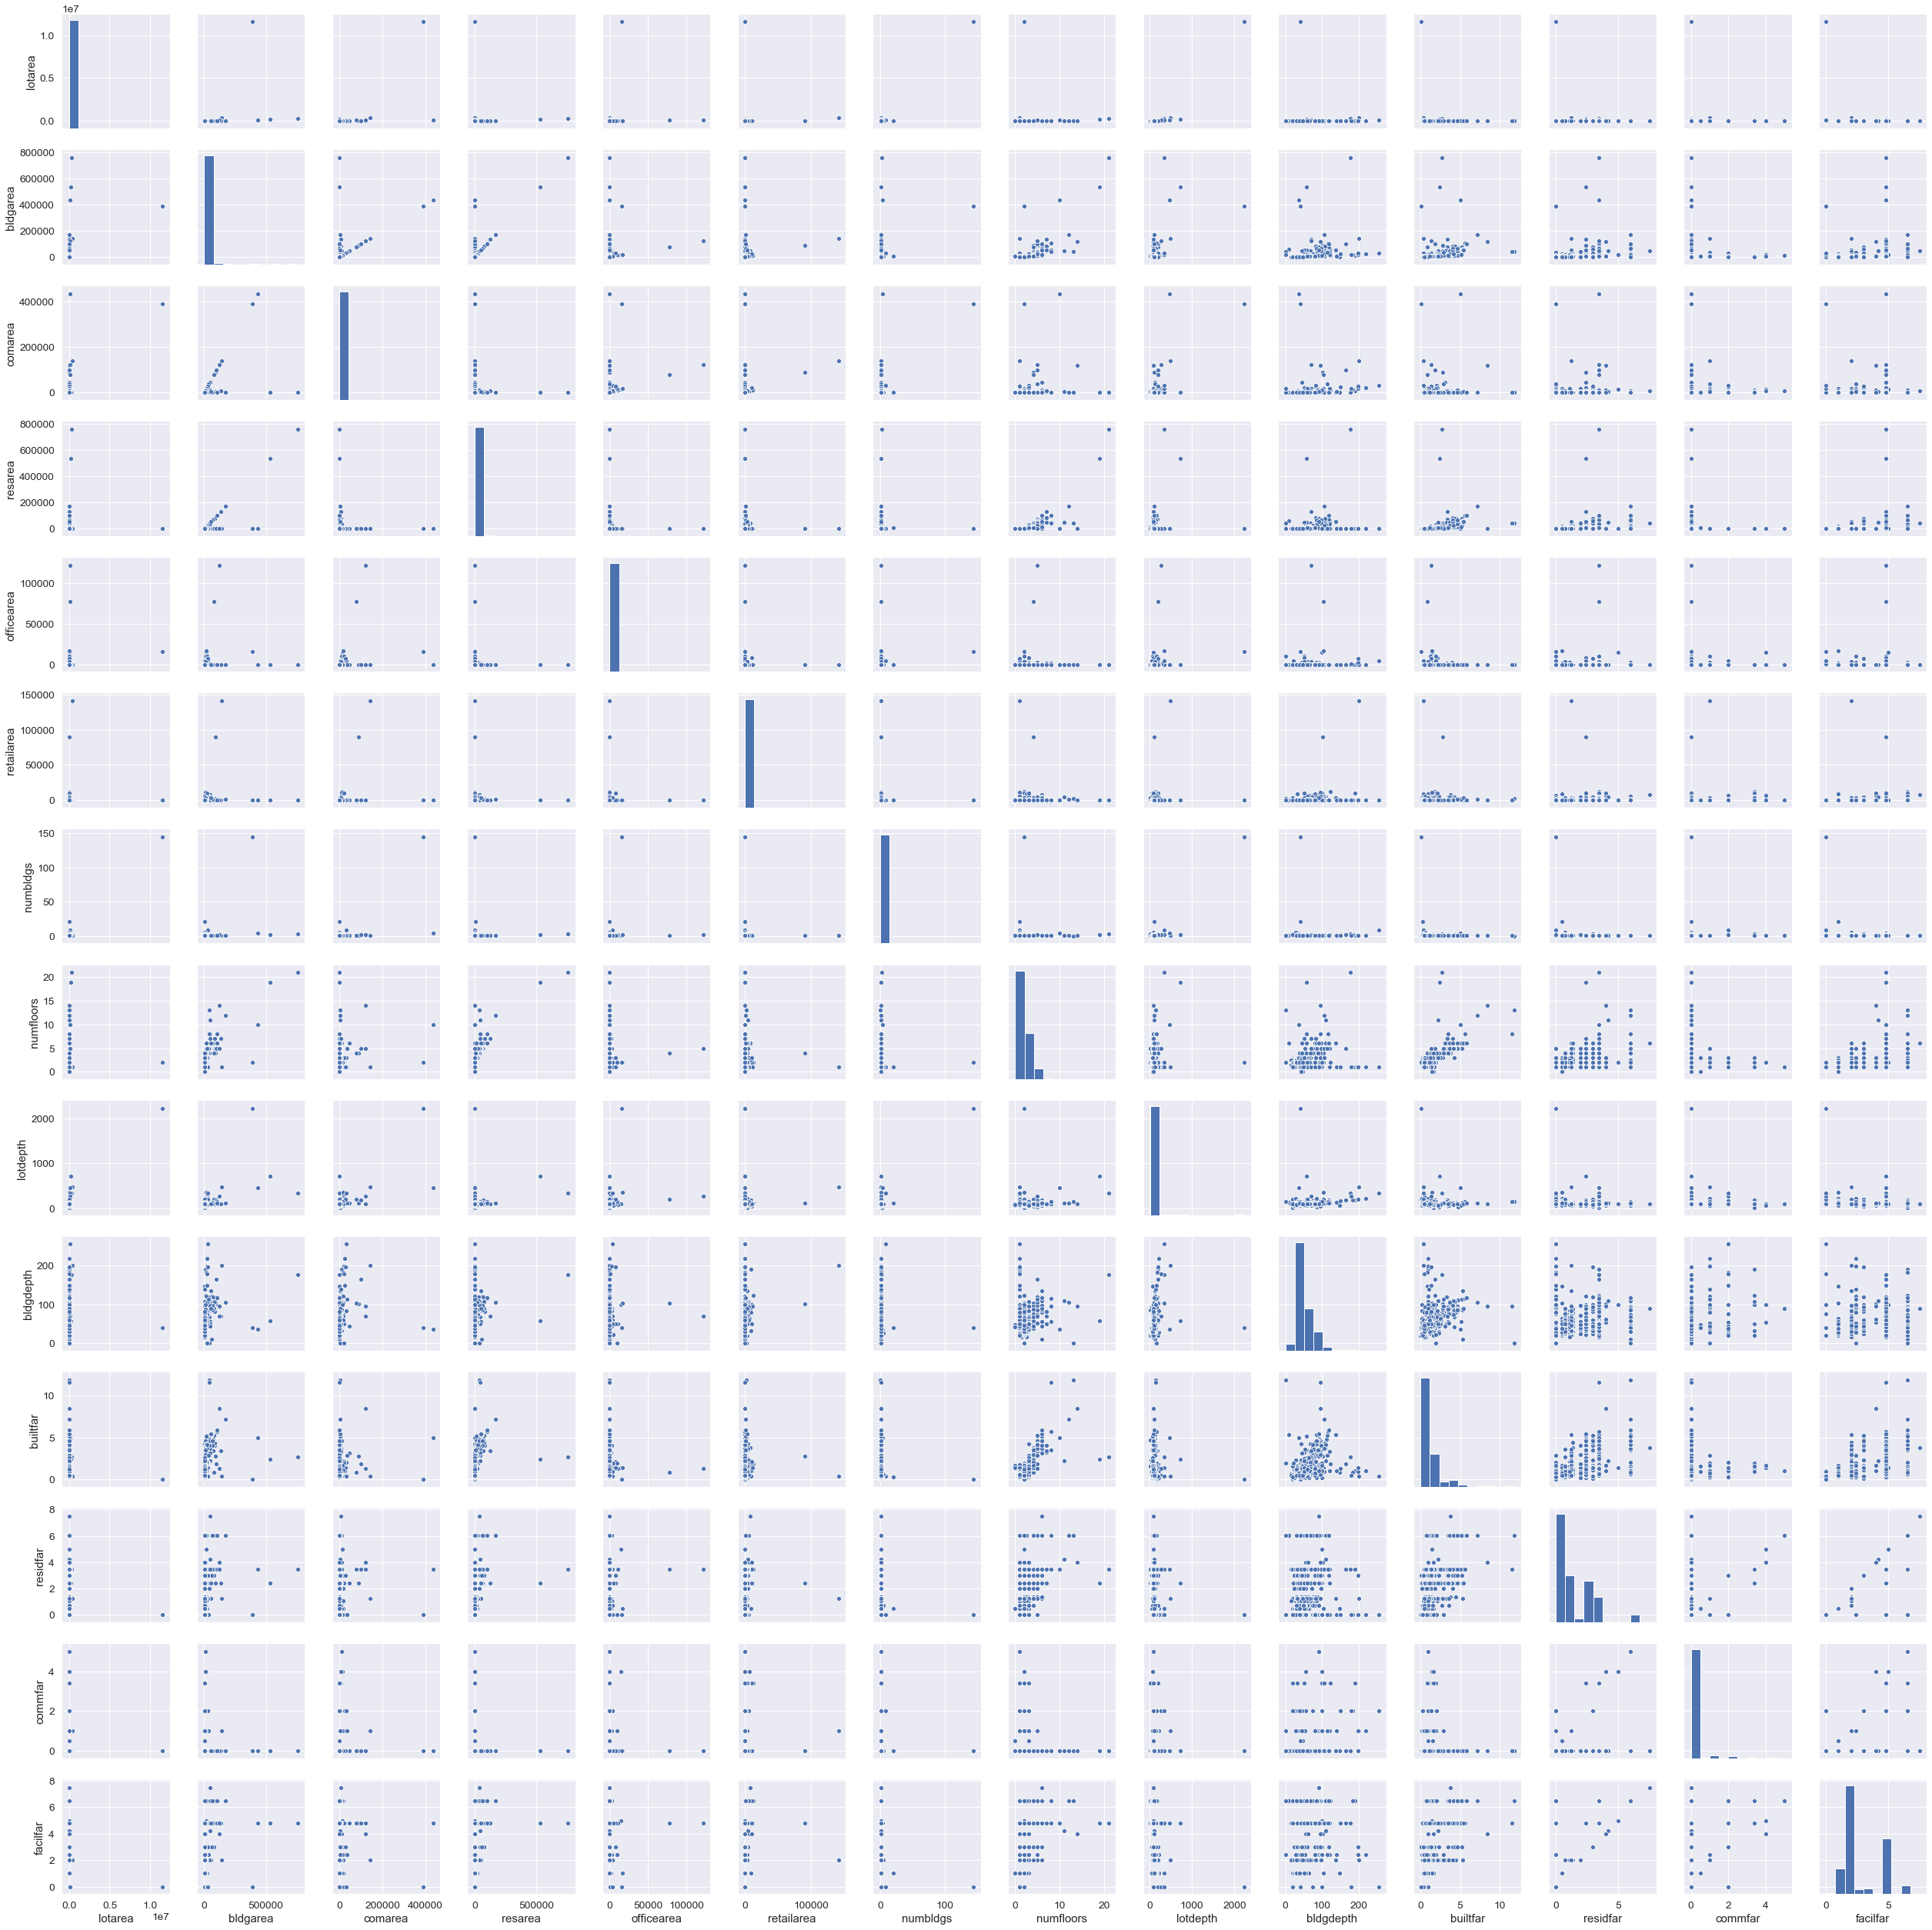

In [12]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df_num.sample(1000))
plt.show()

In [13]:
df_num.corr()

,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar
lotarea,1.000000,0.173485,0.239016,0.076123,0.080875,0.020006,0.382595,0.028068,0.385992,0.030118,-0.008655,-0.009746,0.009796,-0.010466
bldgarea,0.173485,1.000000,0.485793,0.894605,0.213029,0.116055,0.544289,0.363216,0.290327,0.252013,0.191222,0.092195,0.048868,0.098626
comarea,0.239016,0.485793,1.000000,0.044127,0.436485,0.199181,0.360509,0.092327,0.323237,0.288274,0.067797,0.025881,0.121161,0.054864
resarea,0.076123,0.894605,0.044127,1.000000,0.020426,0.030951,0.437787,0.368736,0.166711,0.141273,0.184133,0.093067,-0.005957,0.085618
officearea,0.080875,0.213029,0.436485,0.020426,1.000000,0.045336,0.078537,0.061163,0.197554,0.177945,0.056421,0.035394,0.052435,0.044269
retailarea,0.020006,0.116055,0.199181,0.030951,0.045336,1.000000,0.004708,0.009628,0.129274,0.232818,0.059885,0.069396,0.167523,0.090582
numbldgs,0.382595,0.544289,0.360509,0.437787,0.078537,0.004708,1.000000,0.043749,0.287502,0.032677,-0.051618,-0.041166,0.004571,-0.034835
numfloors,0.028068,0.363216,0.092327,0.368736,0.061163,0.009628,0.043749,1.000000,0.134992,0.288107,0.710535,0.383699,-0.020634,0.339681
lotdepth,0.385992,0.290327,0.323237,0.166711,0.197554,0.129274,0.287502,0.134992,1.000000,0.338629,-0.017295,-0.017635,0.090349,-0.000127
bldgdepth,0.030118,0.252013,0.288274,0.141273,0.177945,0.232818,0.032677,0.288107,0.338629,1.000000,0.418901,0.267608,0.255120,0.324172


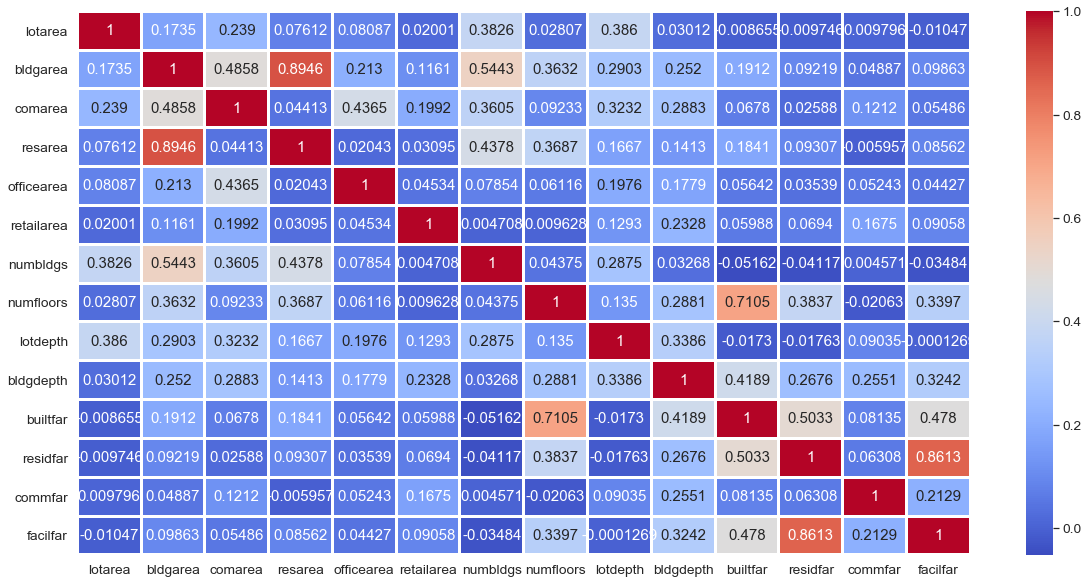

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_num.corr(),cmap="coolwarm",annot=True,fmt='.4g',linewidths=2)
plt.show()

### Load the combined csv

In [15]:
df2 = pd.read_csv("combine.csv")

In [16]:
df2.head()

,zipcode_left,latitude_left,longitude_left,address_left,lot,zipcode_right,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,latitude_right,longitude_right,address_right
0,10461.0,40.855078,-73.852492,NEILL AVENUE,39,10466.0,2000.0,2080.0,0.0,2080.0,0.0,0.0,1.0,2.0,100.0,52.0,2005.0,0.0,1.04,0.75,0.0,2.0,40.896076,-73.839879,BUSSING AVENUE
1,10468.0,40.866135,-73.902726,UNIVERSITY AVENUE,149,10465.0,1823.0,1499.0,0.0,1499.0,0.0,0.0,1.0,2.0,50.0,36.0,1940.0,0.0,0.82,0.75,0.0,2.0,40.813435,-73.822838,SCHURZ AVENUE
2,10463.0,40.878790,-73.901771,BAILEY AVENUE,136,10453.0,1500.0,3423.0,0.0,3423.0,0.0,0.0,1.0,3.0,100.0,37.0,2007.0,0.0,2.28,3.44,0.0,4.8,40.848281,-73.913303,DAVIDSON AVENUE
3,10455.0,40.812037,-73.906544,TINTON AVENUE,56,10469.0,1900.0,1911.0,0.0,1344.0,0.0,0.0,1.0,2.0,100.0,40.0,1965.0,1998.0,1.01,0.75,0.0,2.0,40.866312,-73.858935,PAULDING AVENUE
4,10460.0,40.846939,-73.885253,MAPES AVENUE,57,10461.0,2500.0,1536.0,0.0,1536.0,0.0,0.0,1.0,2.5,100.0,36.0,1920.0,0.0,0.61,0.75,0.0,2.0,40.847051,-73.852947,HONE AVENUE


In [17]:
df2.shape

(17330, 25)

In [18]:
df2.drop(columns=['latitude_left','longitude_left','zipcode_right','latitude_right','longitude_right','address_right'], 
                  axis=1, inplace=True)

In [19]:
df2.head()

,zipcode_left,address_left,lot,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar
0,10461.0,NEILL AVENUE,39,2000.0,2080.0,0.0,2080.0,0.0,0.0,1.0,2.0,100.0,52.0,2005.0,0.0,1.04,0.75,0.0,2.0
1,10468.0,UNIVERSITY AVENUE,149,1823.0,1499.0,0.0,1499.0,0.0,0.0,1.0,2.0,50.0,36.0,1940.0,0.0,0.82,0.75,0.0,2.0
2,10463.0,BAILEY AVENUE,136,1500.0,3423.0,0.0,3423.0,0.0,0.0,1.0,3.0,100.0,37.0,2007.0,0.0,2.28,3.44,0.0,4.8
3,10455.0,TINTON AVENUE,56,1900.0,1911.0,0.0,1344.0,0.0,0.0,1.0,2.0,100.0,40.0,1965.0,1998.0,1.01,0.75,0.0,2.0
4,10460.0,MAPES AVENUE,57,2500.0,1536.0,0.0,1536.0,0.0,0.0,1.0,2.5,100.0,36.0,1920.0,0.0,0.61,0.75,0.0,2.0


In [20]:
df2.isnull().sum()

zipcode_left       4
address_left       0
lot                0
lotarea           12
bldgarea          11
comarea         1435
resarea         1435
officearea      1435
retailarea      1435
numbldgs          12
numfloors         12
lotdepth          12
bldgdepth         12
yearbuilt         10
yearalter1        10
builtfar          17
residfar          10
commfar           10
facilfar          10
dtype: int64

### Visualize the relationships

In [21]:
df2['zipcode_left'].value_counts()

10457.0    2060
10468.0    1484
10467.0    1474
10458.0    1428
10453.0    1267
10452.0    1078
10456.0    1041
10462.0     953
10460.0     816
10451.0     655
10472.0     644
10463.0     640
10466.0     638
10459.0     636
10455.0     517
10473.0     422
10461.0     386
10454.0     385
10469.0     359
10470.0     192
10474.0     120
10471.0      73
10465.0      39
10475.0      13
10464.0       6
Name: zipcode_left, dtype: int64

In [22]:
df2['zipcode_left'].nunique()

25

In [23]:
df2['address_left'].value_counts()

EAST   STREET         2408
TIEBOUT AVENUE        1085
GRAND CONCOURSE        927
WEST   STREET          348
MORRIS AVENUE          274
                      ... 
LA FONTAINE AVENUE       1
CAPUCHIN WAY             1
HATTING PLACE            1
YATES AVENUE             1
WILLETT AVENUE           1
Name: address_left, Length: 535, dtype: int64

In [24]:
df2['address_left'].nunique()

535

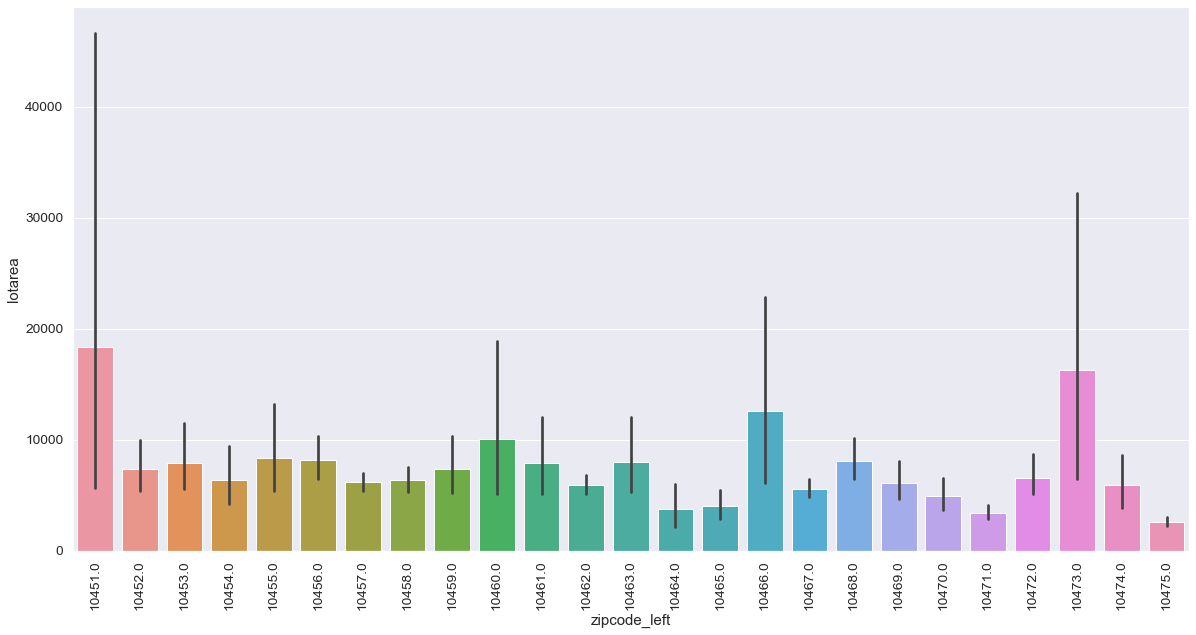

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='lotarea',data=df2)
plt.xticks(rotation=90)
plt.show()

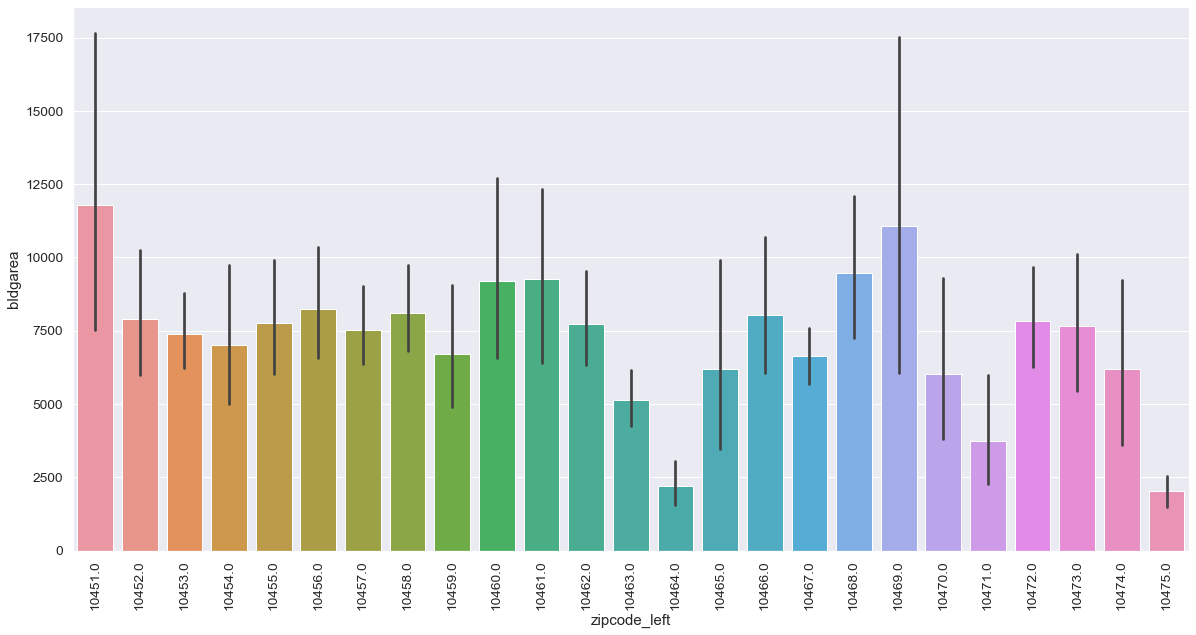

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='bldgarea',data=df2)
plt.xticks(rotation=90)
plt.show()

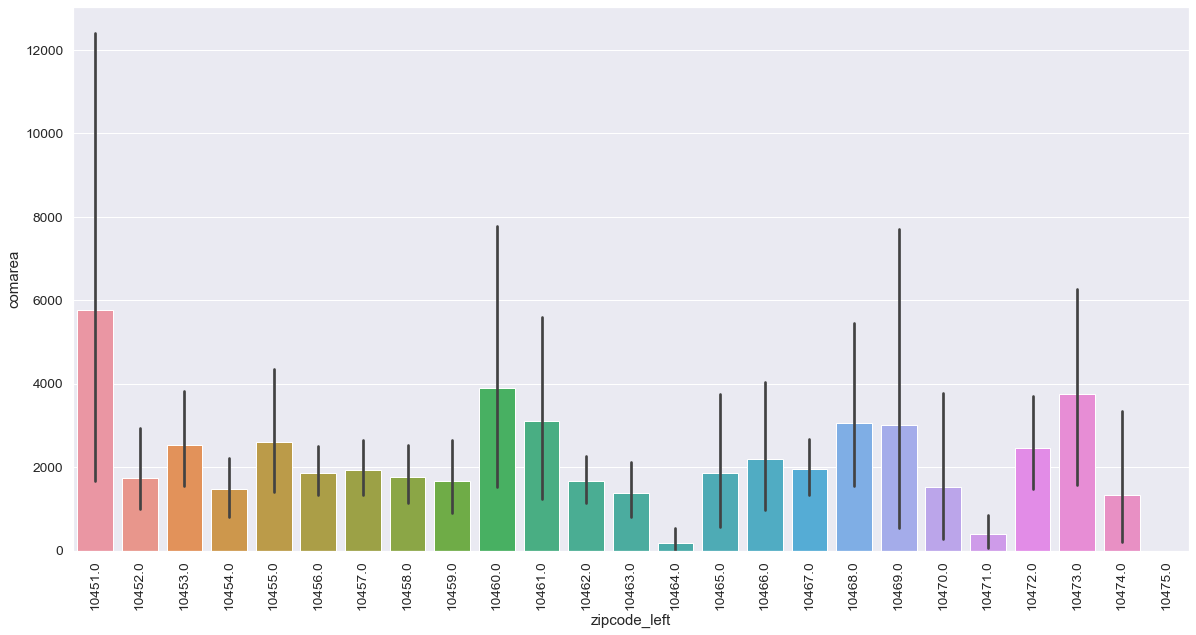

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='comarea',data=df2)
plt.xticks(rotation=90)
plt.show()

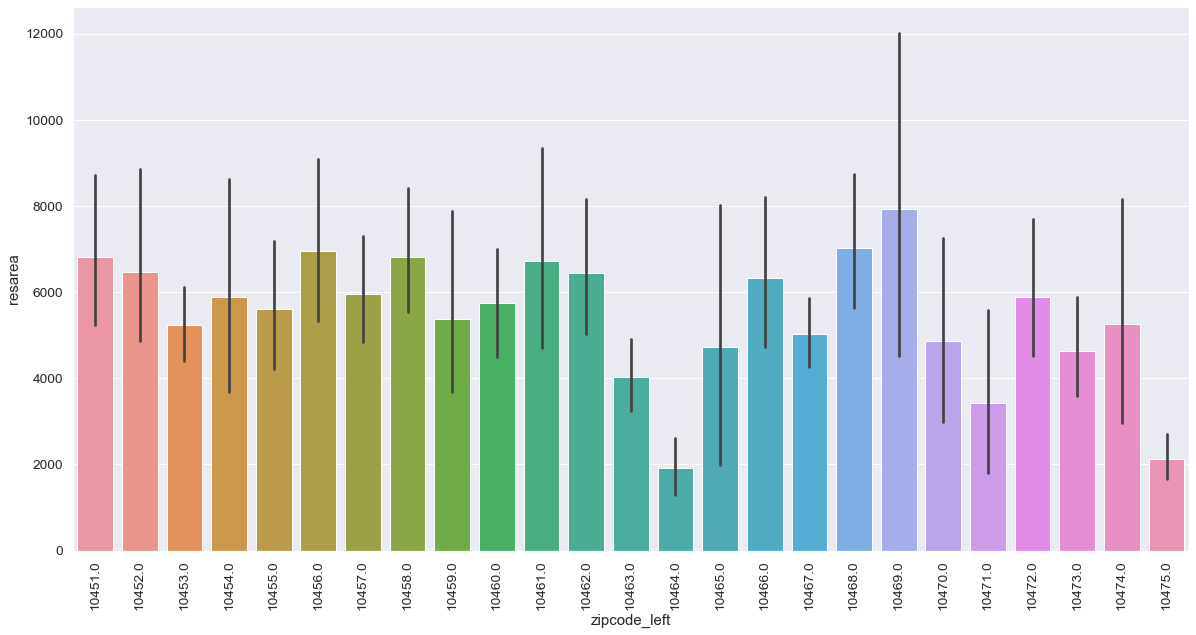

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='resarea',data=df2)
plt.xticks(rotation=90)
plt.show()

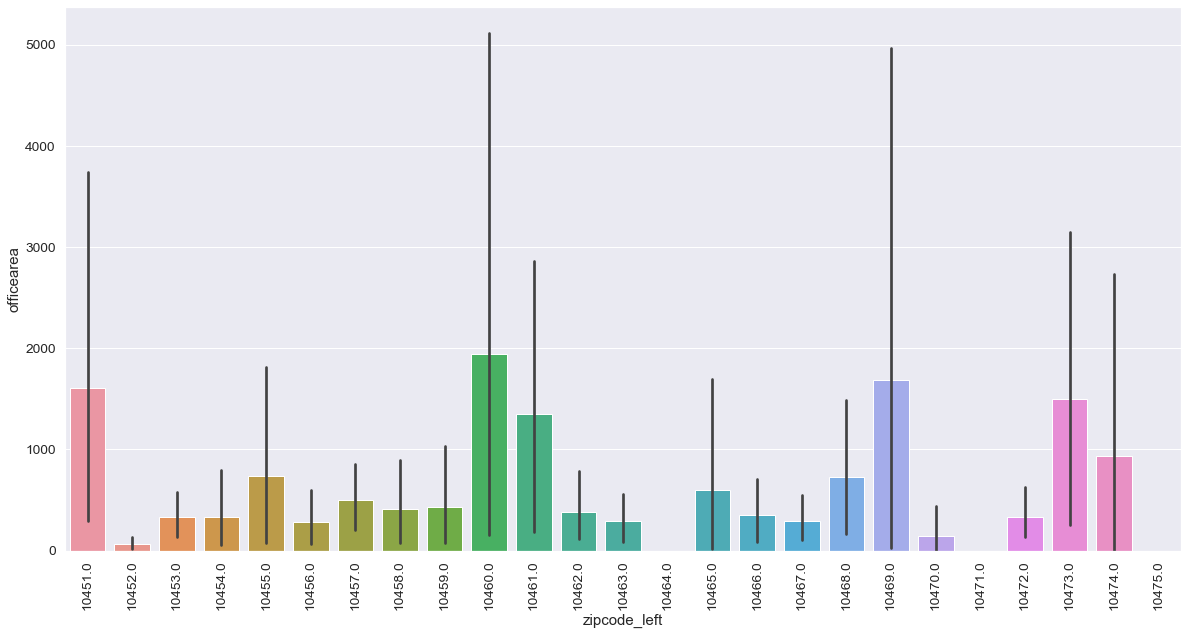

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='officearea',data=df2)
plt.xticks(rotation=90)
plt.show()

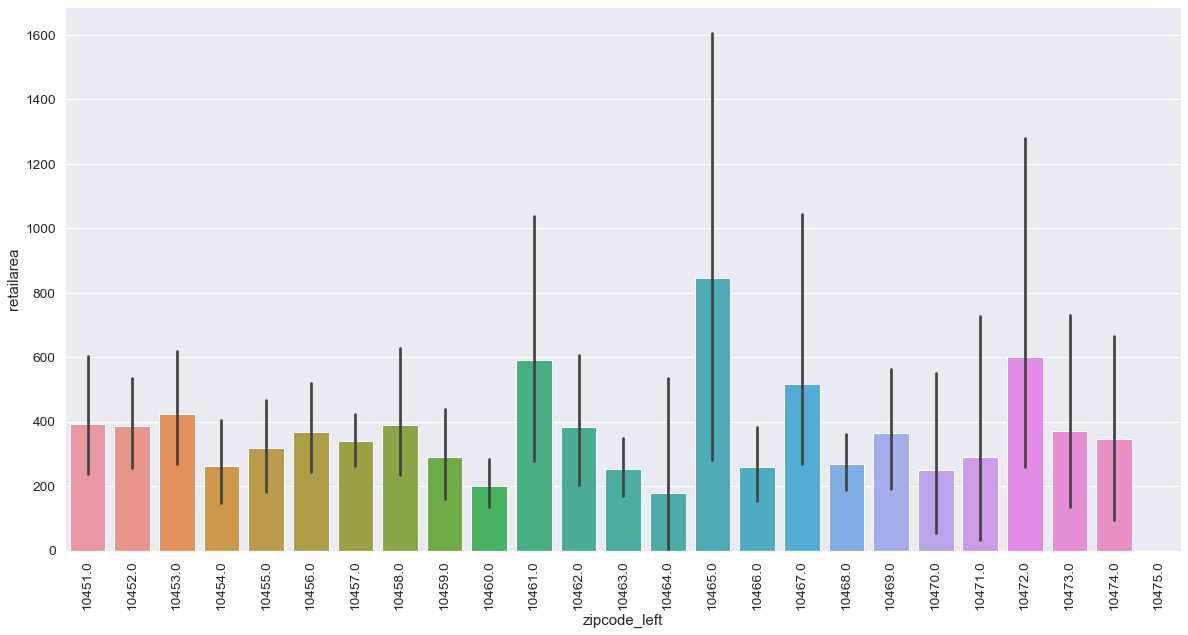

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='retailarea',data=df2)
plt.xticks(rotation=90)
plt.show()

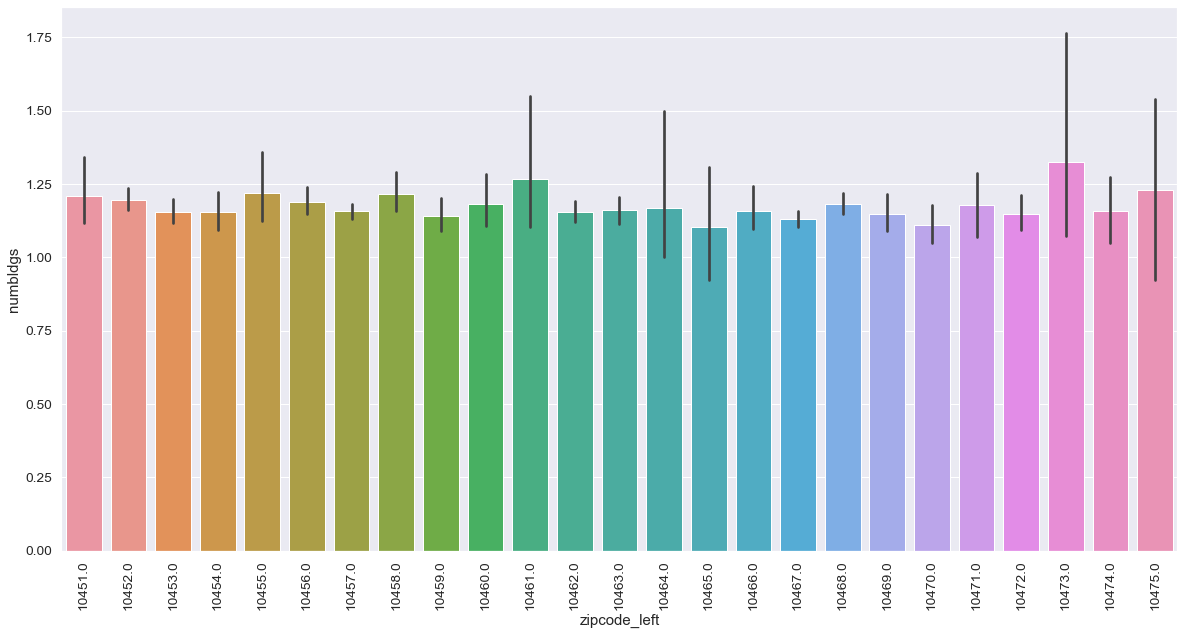

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='numbldgs',data=df2)
plt.xticks(rotation=90)
plt.show()

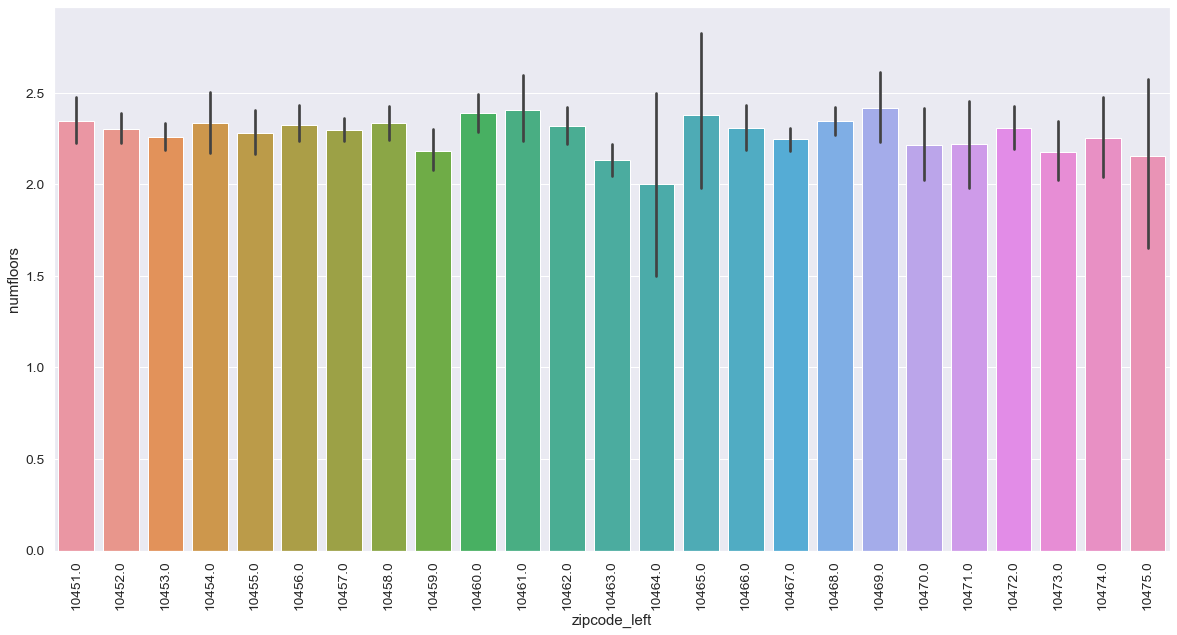

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='numfloors',data=df2)
plt.xticks(rotation=90)
plt.show()

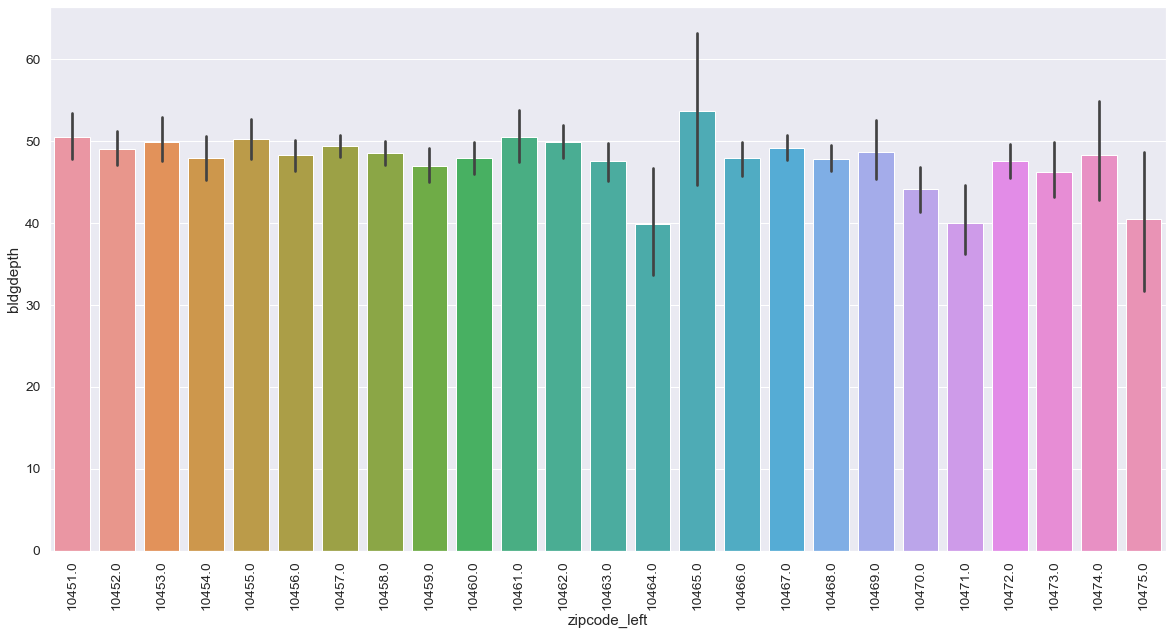

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='bldgdepth',data=df2)
plt.xticks(rotation=90)
plt.show()

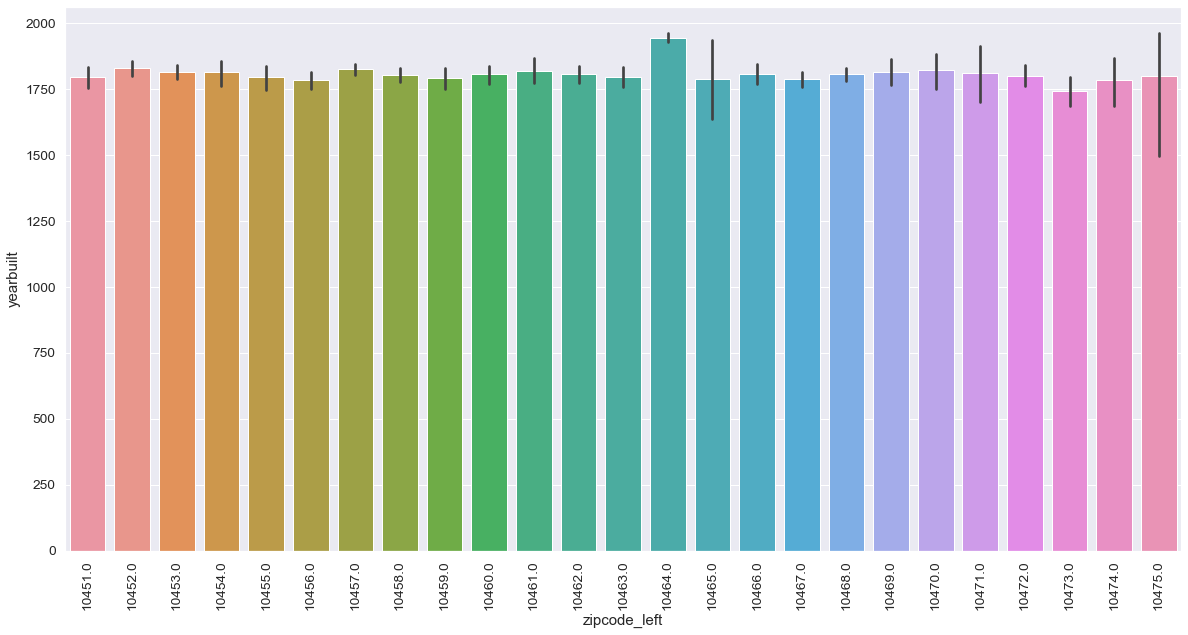

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='yearbuilt',data=df2)
plt.xticks(rotation=90)
plt.show()

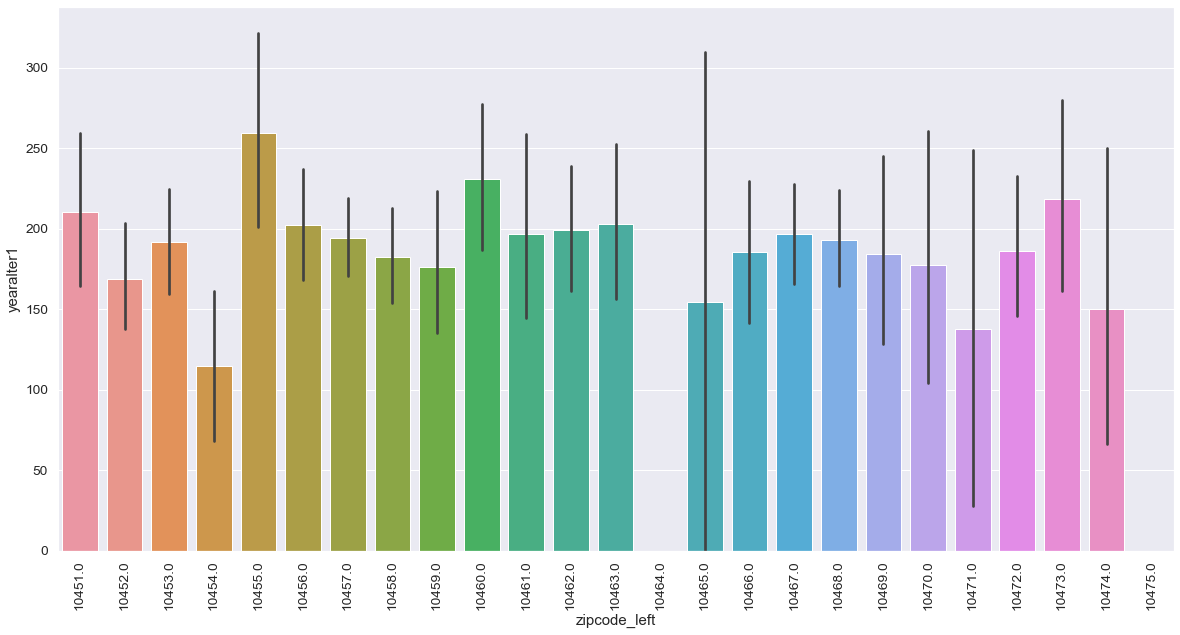

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='yearalter1',data=df2)
plt.xticks(rotation=90)
plt.show()

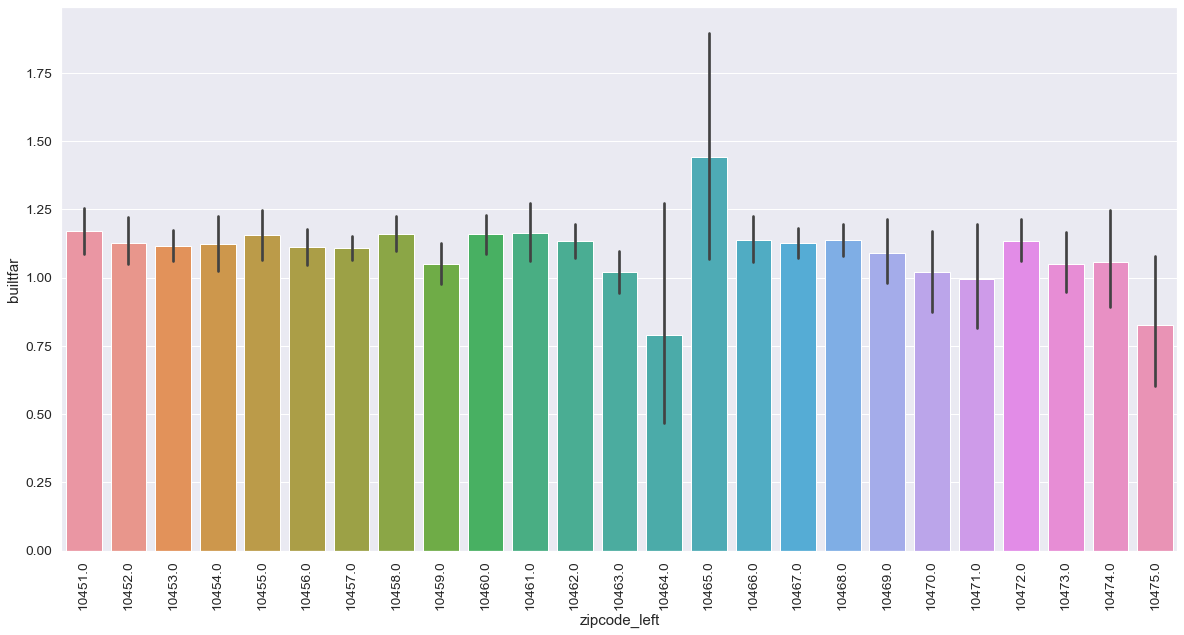

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='builtfar',data=df2)
plt.xticks(rotation=90)
plt.show()

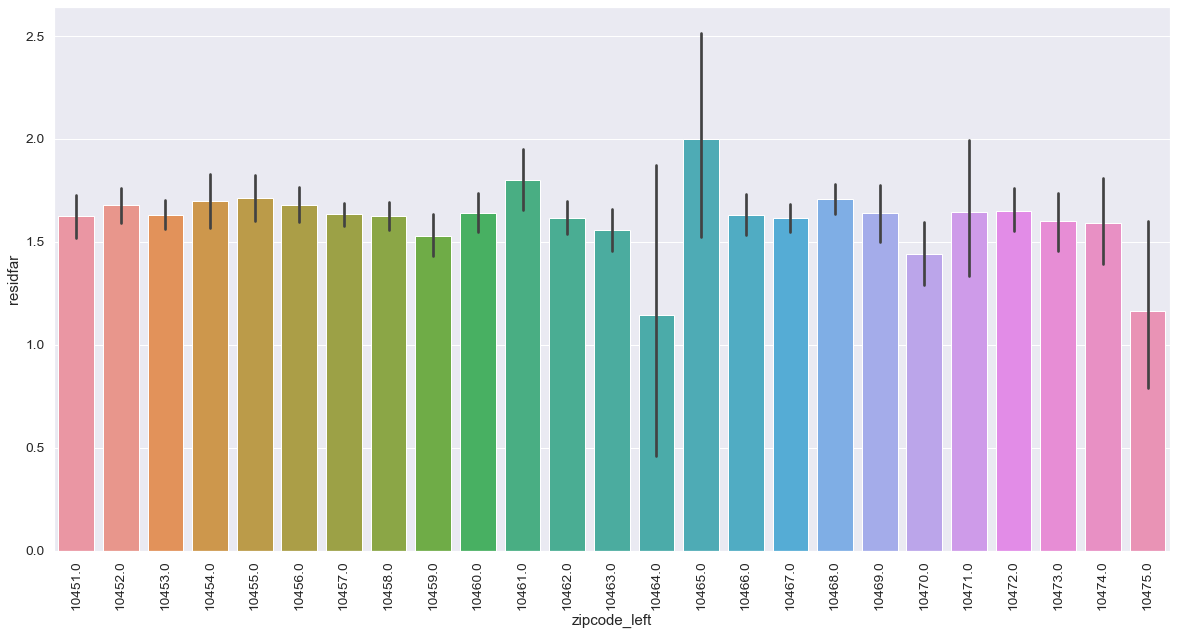

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='residfar',data=df2)
plt.xticks(rotation=90)
plt.show()

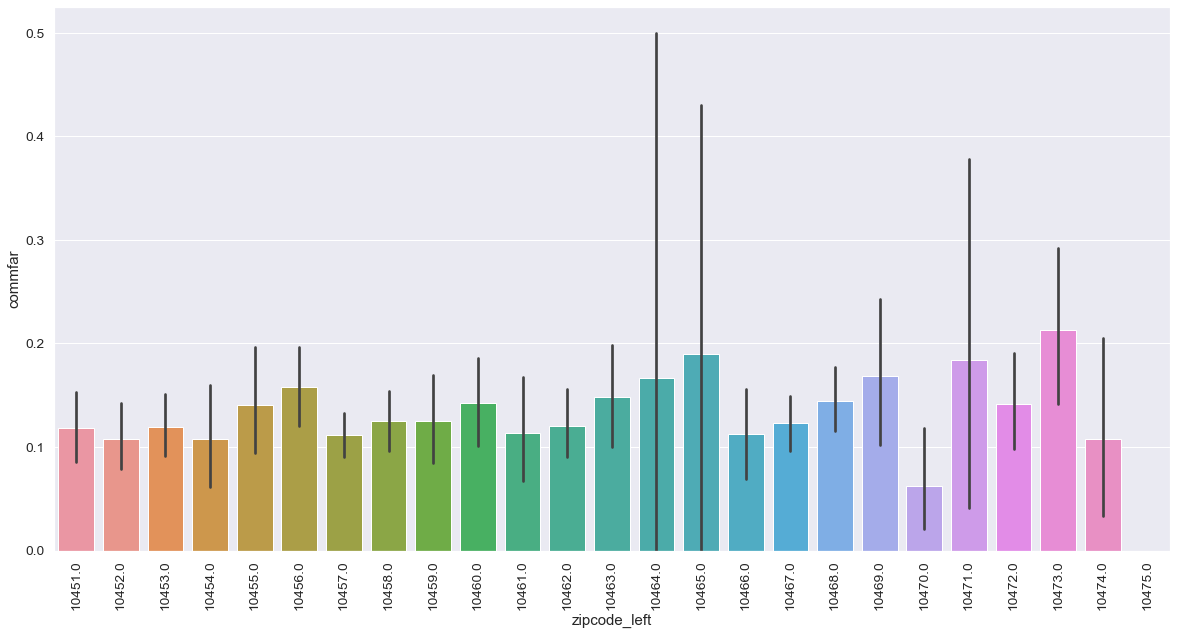

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='commfar',data=df2)
plt.xticks(rotation=90)
plt.show()

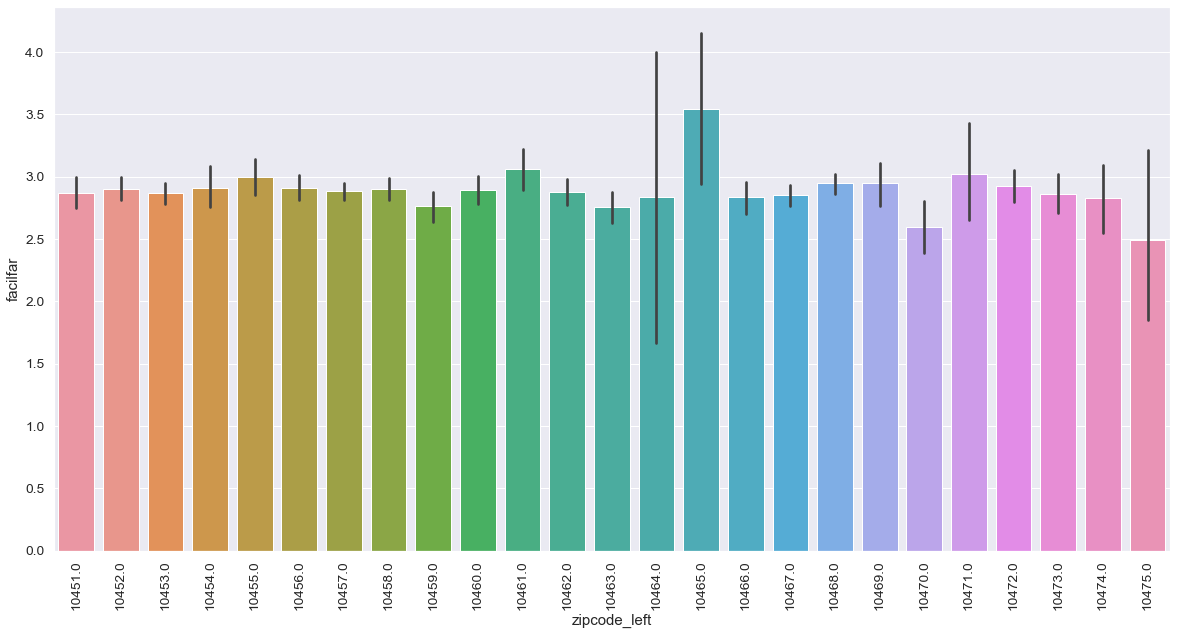

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode_left',y='facilfar',data=df2)
plt.xticks(rotation=90)
plt.show()

In [40]:
df2_num = df2.drop(columns=['zipcode_left','address_left'],axis=1)

In [41]:
df2_num.head()

,lot,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar
0,39,2000.0,2080.0,0.0,2080.0,0.0,0.0,1.0,2.0,100.0,52.0,2005.0,0.0,1.04,0.75,0.0,2.0
1,149,1823.0,1499.0,0.0,1499.0,0.0,0.0,1.0,2.0,50.0,36.0,1940.0,0.0,0.82,0.75,0.0,2.0
2,136,1500.0,3423.0,0.0,3423.0,0.0,0.0,1.0,3.0,100.0,37.0,2007.0,0.0,2.28,3.44,0.0,4.8
3,56,1900.0,1911.0,0.0,1344.0,0.0,0.0,1.0,2.0,100.0,40.0,1965.0,1998.0,1.01,0.75,0.0,2.0
4,57,2500.0,1536.0,0.0,1536.0,0.0,0.0,1.0,2.5,100.0,36.0,1920.0,0.0,0.61,0.75,0.0,2.0


In [42]:
df2_num.dropna(inplace=True)

<Figure size 1440x1440 with 0 Axes>

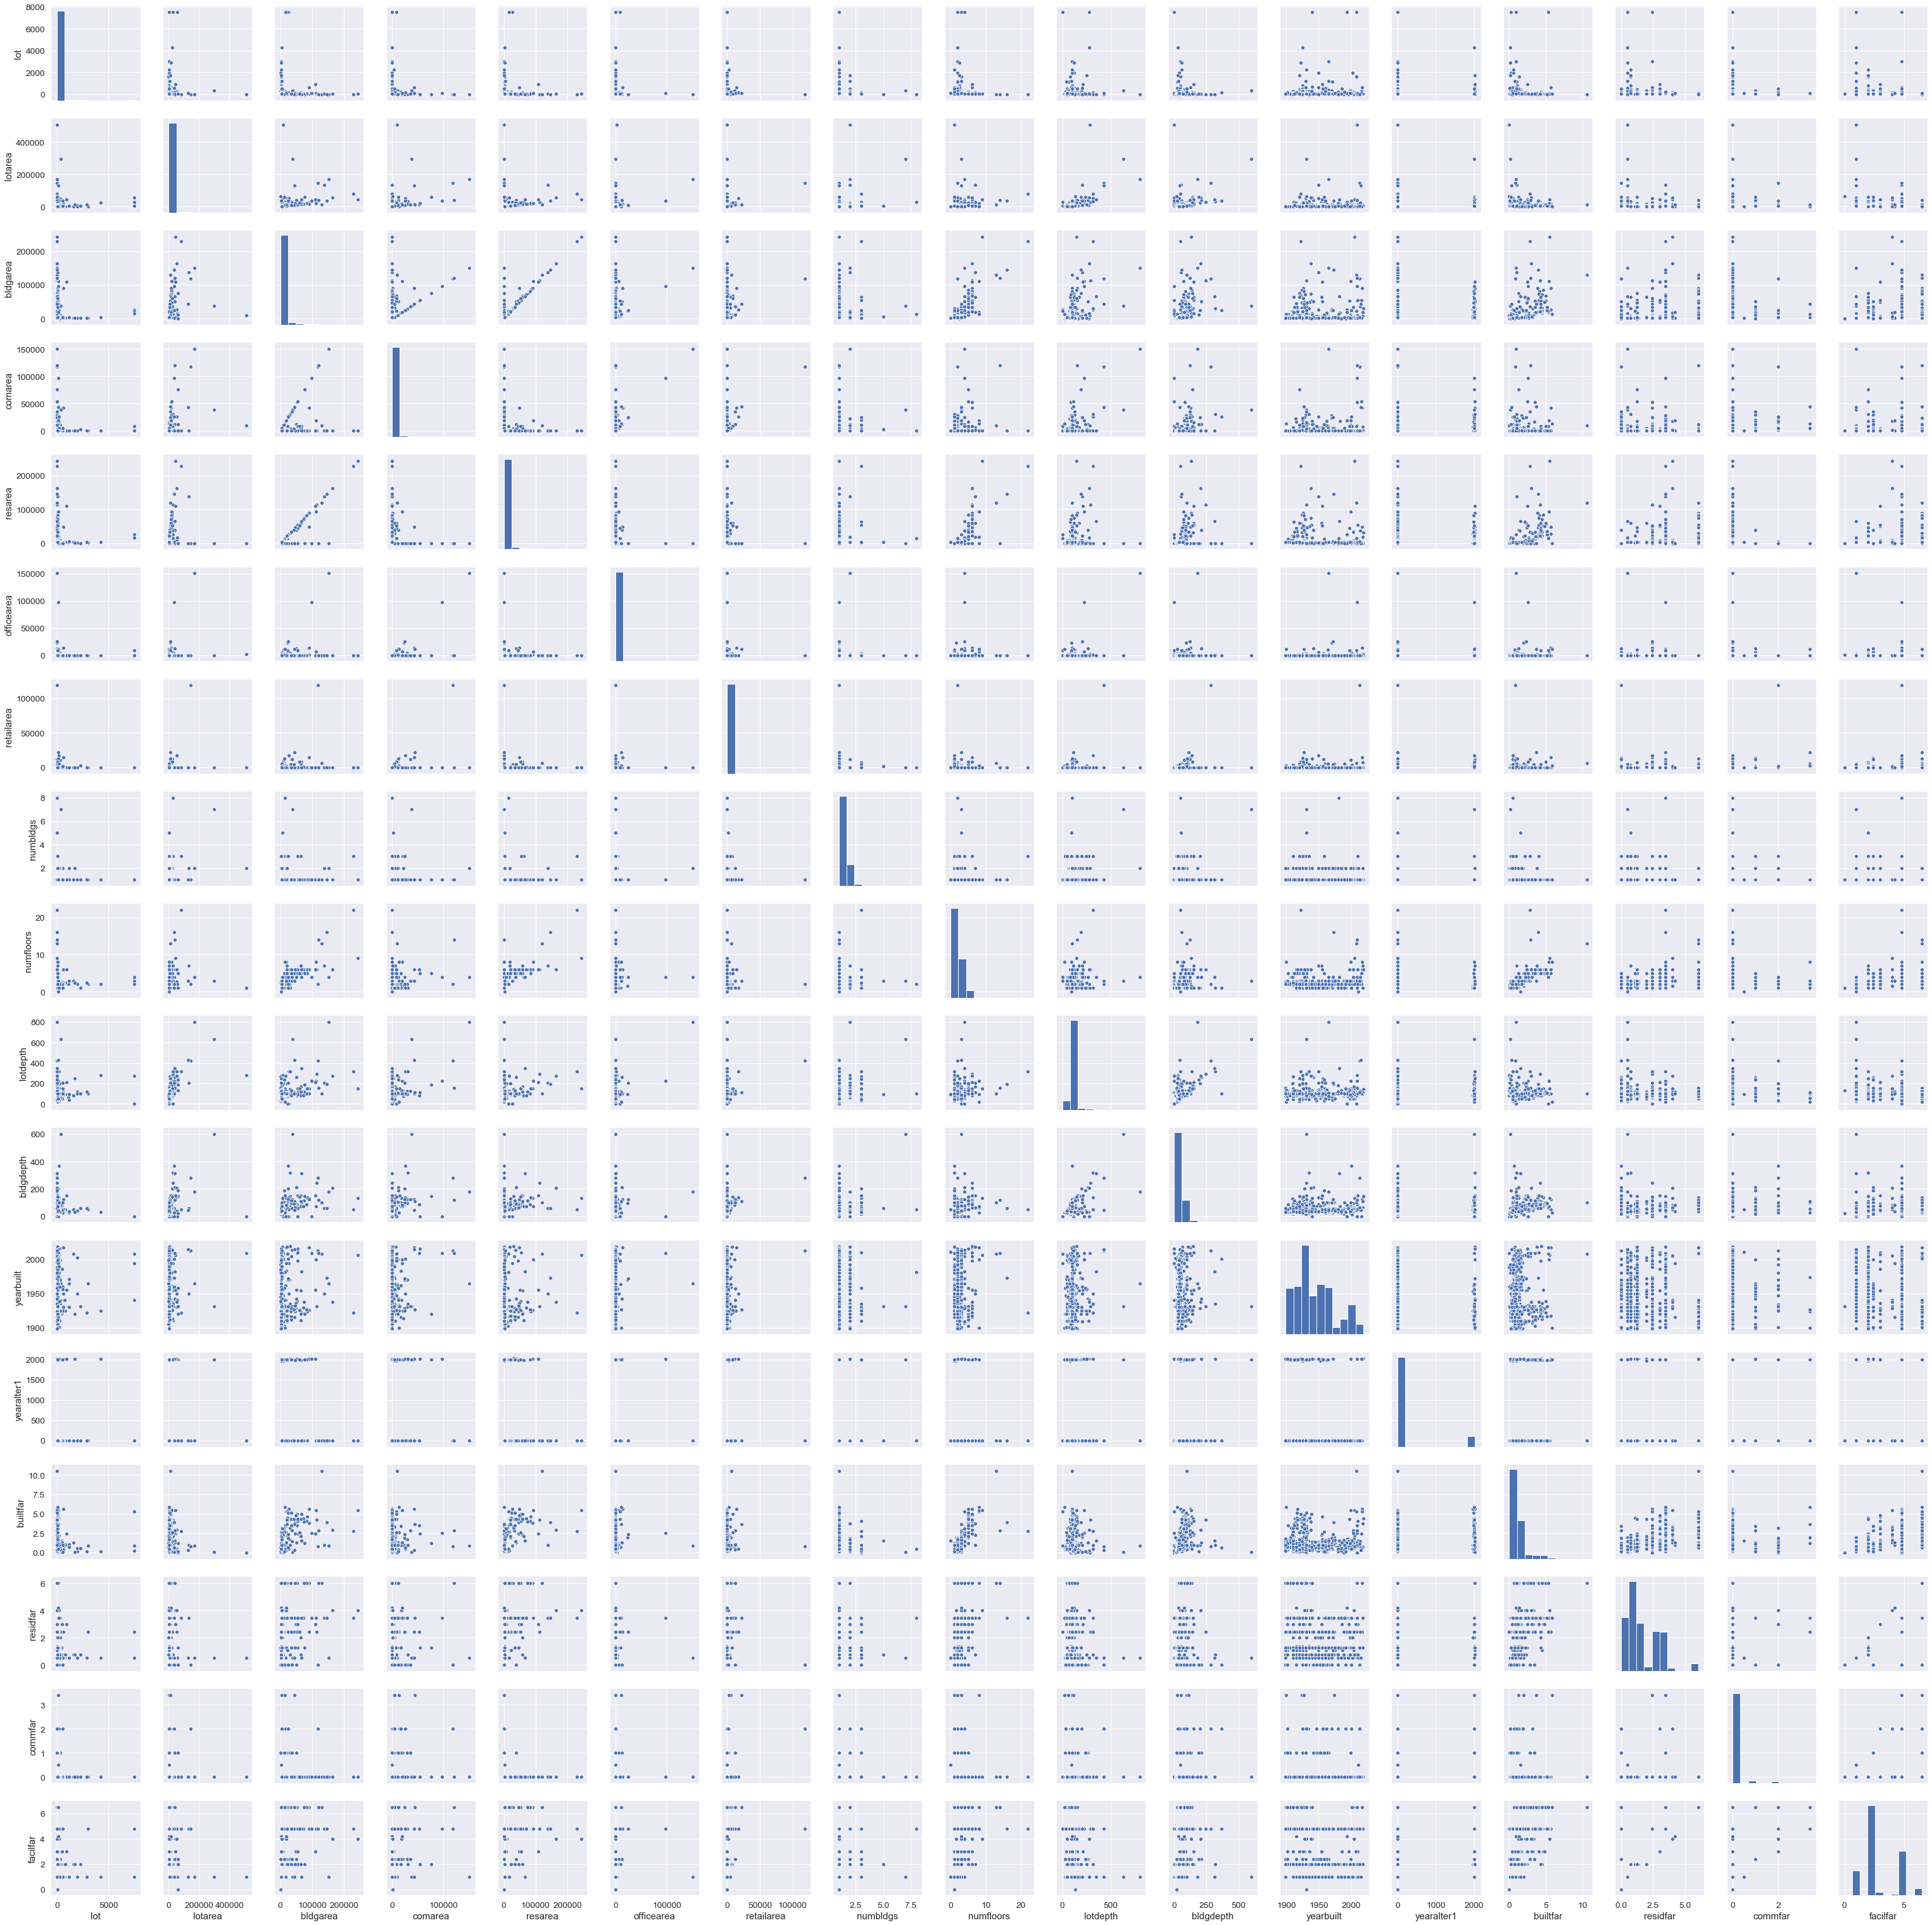

In [43]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df2_num.sample(1000))
plt.show()

In [44]:
df2_num.corr()

,lot,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar
lot,1.000000,0.037084,0.120939,0.056149,0.114348,0.043985,0.019449,-0.005088,0.092865,0.025391,0.010064,0.061635,0.009699,0.078104,-0.011405,0.001110,-0.025212
lotarea,0.037084,1.000000,0.560927,0.640469,0.142013,0.383152,0.033589,0.340570,0.068225,0.620888,0.179842,0.010906,0.067644,-0.004169,-0.011234,0.044433,-0.013359
bldgarea,0.120939,0.560927,1.000000,0.721509,0.691351,0.446812,0.173875,0.240042,0.521278,0.496986,0.436045,0.027079,0.151912,0.374335,0.171932,0.093001,0.164319
comarea,0.056149,0.640469,0.721509,1.000000,-0.000942,0.623721,0.219665,0.202710,0.089966,0.477959,0.330004,0.022990,0.104955,0.083963,0.019462,0.147904,0.042473
resarea,0.114348,0.142013,0.691351,-0.000942,1.000000,-0.005236,0.022423,0.135474,0.659943,0.219060,0.286251,0.014744,0.110071,0.453108,0.229953,-0.020334,0.194903
officearea,0.043985,0.383152,0.446812,0.623721,-0.005236,1.000000,0.020166,0.225839,0.059194,0.221427,0.212059,0.012309,0.048521,0.055936,0.022405,0.051632,0.022930
retailarea,0.019449,0.033589,0.173875,0.219665,0.022423,0.020166,1.000000,0.005315,0.011068,0.108235,0.223366,0.016127,0.080520,0.075491,0.073450,0.173884,0.099652
numbldgs,-0.005088,0.340570,0.240042,0.202710,0.135474,0.225839,0.005315,1.000000,-0.008039,0.330160,0.049927,-0.045358,0.031588,-0.059257,-0.061154,0.005018,-0.055772
numfloors,0.092865,0.068225,0.521278,0.089966,0.659943,0.059194,0.011068,-0.008039,1.000000,0.128361,0.281396,0.049210,0.157223,0.729086,0.399560,-0.026415,0.345349
lotdepth,0.025391,0.620888,0.496986,0.477959,0.219060,0.221427,0.108235,0.330160,0.128361,1.000000,0.411533,0.012744,0.087203,-0.027792,-0.027714,0.088330,-0.016856


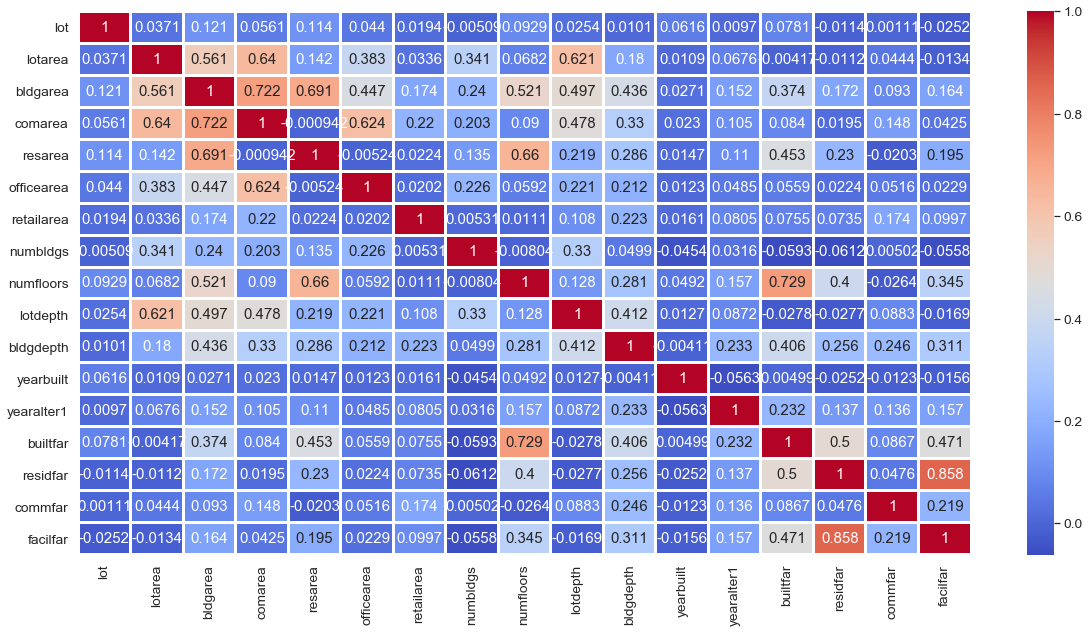

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df2_num.corr(),cmap="coolwarm",annot=True,fmt='.3g',linewidths=2)
plt.show()

### Conclusion

**Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?**

ComArea with BldgArea, ResArea with BldgArea, BuiltFAR with NumFloors, FacilFAR with ResidFAR